1- https://www.kaggle.com/jesyfax/predicting-fraud-in-financial-payment-services <br>
2-https://www.kaggle.com/aadilrafeeque/exploratory-data-analysis-and-fraud-prediction<br>
3-https://www.kaggle.com/stark10war/fraud-detection-eda-and-modelling<br>
4-https://www.kaggle.com/stark10war/fraud-detection-eda-and-modelling<br>
5-https://www.kaggle.com/arjunjoshua/predicting-fraud-in-financial-payment-services

### Synthetic Financial Datasets For Fraud Detection by Kaggle

https://www.kaggle.com/ntnu-testimon/paysim1/kernels

### Content

PaySim simulates mobile money transactions based on a sample of real transactions extracted from one month of financial logs from a mobile money service implemented in an African country. The original logs were provided by a multinational company, who is the provider of the mobile financial service which is currently running in more than 14 countries all around the world.

This synthetic dataset is scaled down 1/4 of the original dataset and it is created just for Kaggle.

### Headers

This is a sample of 1 row with headers explanation:

1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0
<br>
step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).<br>

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.<br>

amount - amount of the transaction in local currency.<br>

nameOrig - customer who started the transaction<br>

oldbalanceOrg - initial balance before the transaction<br>

newbalanceOrig - new balance after the transaction <br>

nameDest - customer who is the recipient of the transaction<br>

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).<br>

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).<br>

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.<br>

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.<br>

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [3]:
df= pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
print("Is there any null values: {} ".format(df.isnull().values.any()))
print("Number of records:{} \nNumber of features: {} ".format(df.shape[0],df.shape[1]))
df.describe()

Is there any null values: False 
Number of records:6362620 
Number of features: 11 


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Transaction type (Quantity)

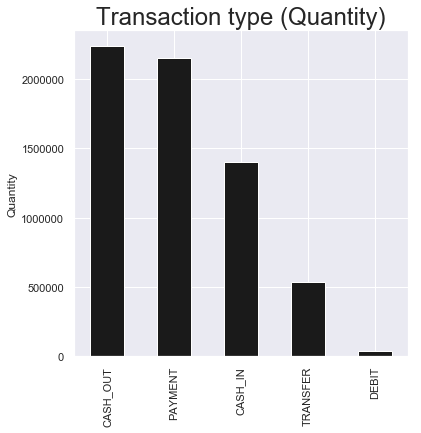

In [6]:

alltypes=df.type.value_counts()
alltypes.plot(kind='bar', figsize=(6,6),color='k')
plt.title("Transaction type (Quantity)", size=24)
plt.ylabel("Quantity")
plt.show()

## Transaction type (Amount/Type)

type
DEBIT       2.271992e+08
PAYMENT     2.809337e+10
CASH_IN     2.363674e+11
CASH_OUT    3.944130e+11
TRANSFER    4.852920e+11
Name: amount, dtype: float64

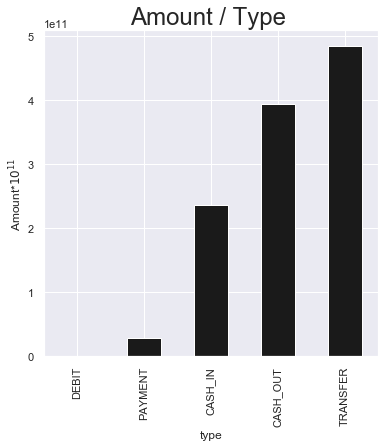

In [7]:
amountpertype =df.amount.groupby(df.type).sum().sort_values()
amountpertype.plot(kind='bar', figsize=(6,6),color='k')
plt.title("Amount / Type ", size=24,)
plt.ylabel("Amount*$10^{11}$")
amountpertype

## Correlations

In [8]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


## Fraud / NonFraud 

<Figure size 1440x1440 with 0 Axes>

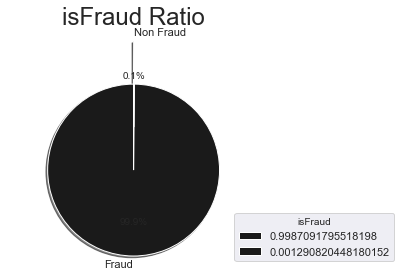

In [9]:
plt.figure(figsize=[20,20])

isFraud = df.isFraud.groupby(df.isFraud).count()
isFraud[0]/df.shape[0]
isFraud[1]/df.shape[0]

labels = 'Fraud', 'Non Fraud'
sizes = [isFraud[0]/df.shape[0]*100,isFraud[1]/df.shape[0]*100]
explode = (0, 0.5)  # only "explode" the 2nd slice (i.e. 'Hogs')

ingredients = [isFraud[0]/df.shape[0],isFraud[1]/df.shape[0]]

fig1, ax1 = plt.subplots()
wedges, texts, autotexts =ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors='k')

ax1.legend(wedges, ingredients,
          title="isFraud",
          loc="lower center",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("isFraud Ratio",size=24,loc='center')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

## Fraudulent Transaction Types

Text(0.5, 1.0, 'Fraudulent Transaction Types')

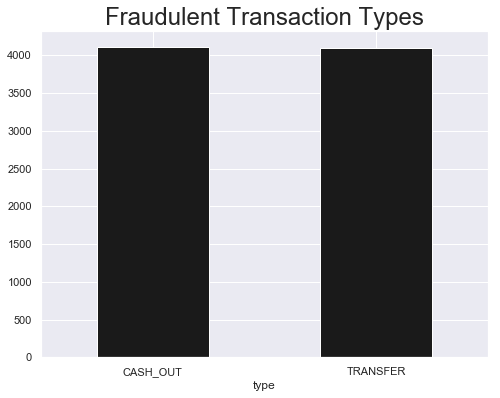

In [10]:
types= df.isFraud[df.isFraud==1].groupby(df.type).count()
types.plot(kind='bar',color='k',rot=0,figsize=(8,6))
plt.title('Fraudulent Transaction Types',size=24)

Text(0.5, 0, 'Hours')

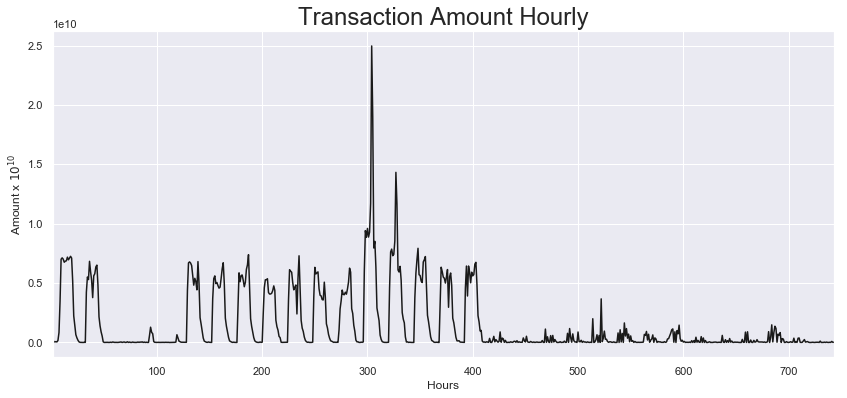

In [109]:
df.amount.groupby(df.step).sum().plot(color='k',rot=0,figsize=(14,6))
plt.title("Transaction Amount Hourly", size =24)
plt.ylabel("Amount x $10^{10}$")
plt.xlabel("Hours")

Text(0.5, 0, 'Hours')

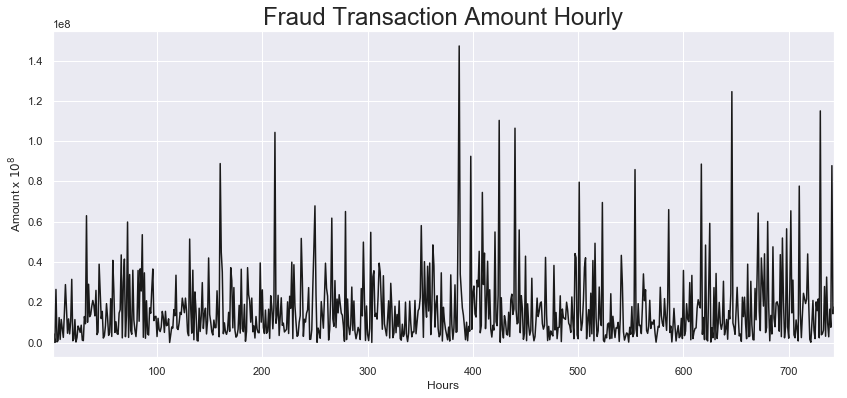

In [115]:
df.amount[df.isFraud==1].groupby(df.step).sum().plot(color='k',rot=0,figsize=(14,6))
plt.title("Fraud Transaction Amount Hourly", size =24)
plt.ylabel("Amount x $10^{8}$")
plt.xlabel("Hours")

In [59]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Accurate_Orig,Accurate_Dest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,True,False
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,True,False


In [138]:
from scipy.stats import mode
import numpy as np

In [139]:
fraud_amounts = df.amount[df.isFraud==1].values.tolist()
mode(fraud_amounts)
np.median(df.amount[df.isFraud==1].values)

441423.44

In [140]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Accurate_Orig,Accurate_Dest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,True,False
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,True,False


In [141]:
df['daily'] =df.step%24

Text(0.5, 0, 'Hours')

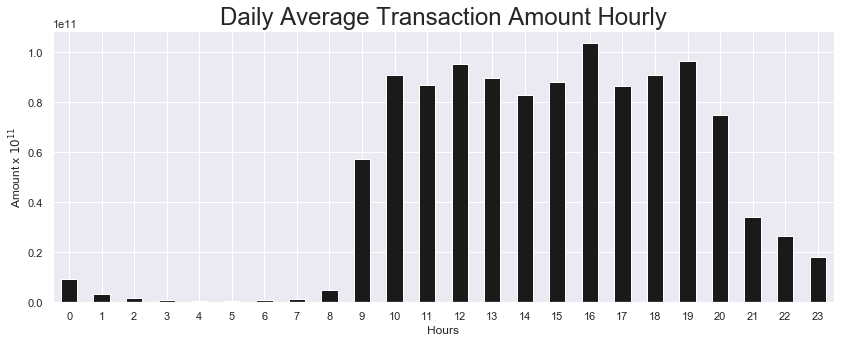

In [150]:
df.amount.groupby(df.daily).sum().plot(kind='bar',color='k',rot=0,figsize=(14,5))
plt.title("Daily Average Transaction Amount Hourly", size =24)
plt.ylabel("Amount x $10^{11}$")
plt.xlabel("Hours")

Text(0.5, 0, 'Hours')

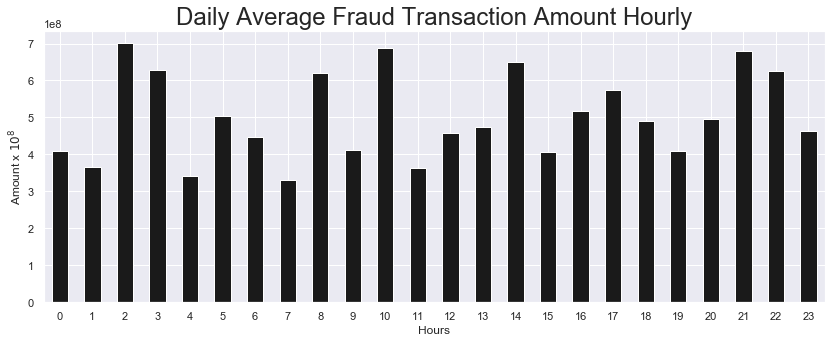

In [152]:
df.amount[df.isFraud==1].groupby(df.daily).sum().plot(kind='bar',color='k',rot=0,figsize=(14,5))
plt.title("Daily Average Fraud Transaction Amount Hourly", size =24)
plt.ylabel("Amount x $10^{8}$")
plt.xlabel("Hours")

In [119]:
df ['Accurate_Orig'] = (df.oldbalanceOrg-df.newbalanceOrig) == df.amount
df ['Accurate_Dest'] = (df.newbalanceDest-df.oldbalanceDest) == df.amount

In [57]:
df['Accurate_Orig'][df['Accurate_Orig']==True].count()

440511

In [58]:
df['Accurate_Dest'][df['Accurate_Dest']==True].count()

760360

In [35]:
types

type
CASH_OUT    0.501157
TRANSFER    0.498843
Name: isFraud, dtype: float64

In [46]:
a= sum(df.oldbalanceOrg[(df.isFraud==1) & (df.type=='TRANSFER')])
a

7564595045.719977

In [45]:
b= sum(df.newbalanceOrig[(df.isFraud==1) & (df.type=='TRANSFER')])
b

1579821917.6599996

In [33]:
loss_money =df[['oldbalanceOrg','newbalanceOrig','newbalanceDest','oldbalanceDest']][(df.isFraud==1) & (df.type=='TRANSFER')]
loss_money.head()
loss_money.newBalanceOrig[loss_money.newBalanceOrig==0].count()/loss_money.shape[0]
loss_money.newBalanceDest[loss_money.newBalanceDest==0].count()/loss_money.shape[0]
loss_money.oldBalanceOrig.sum()

AttributeError: 'DataFrame' object has no attribute 'newBalanceOrig'

In [ ]:
loss_money_cash =df[['oldBalanceOrig','newBalanceOrig','oldBalanceDest','newBalanceDest']][(df.isFraud==1) & (df.type=='CASH_OUT')]

In [ ]:
loss_money_cash.newBalanceOrig[loss_money_cash.newBalanceOrig==0].count()/loss_money_cash.shape[0]

In [ ]:
1- (loss_money_cash.newBalanceDest[loss_money_cash.newBalanceDest==0].count()/loss_money_cash.shape[0])

In [ ]:
loss_money_cash.oldBalanceOrig.sum()

In [ ]:
plt.figure(figsize=[10,20])
loss_money.plot(figsize=(10,5))


In [ ]:
#.plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))

In [ ]:
x = df.type[df.type=='TRANSFER'].count()
y = df.type[(df.isFraud==1) & (df.type=='TRANSFER')].count()
k = df.type[(df.isFraud==1)].count()

In [ ]:
print(x)
print(y)
print(y/x*100)
print(y/df.shape[0]*100)
y/k*100


In [ ]:
x1 = df.type[df.type=='CASH_OUT'].count()
y1 = df.type[(df.isFraud==1) & (df.type=='CASH_OUT')].count()
k1 = df.type[(df.isFraud==1)].count()

In [ ]:
print(x1)
print(y1)
print(y1/x1*100)
print(y1/df.shape[0]*100)
y1/k1*100


In [ ]:
df.head()

In [ ]:
import numpy as np
amount = lambda x:((0,1)[x > 100000],2)[x > 1000000]

plt.figure(figsize=[6,8])


df['Amount_Cat'] = df['amount'].apply(amount)

df['Amount_Cat']


bars1 = df['Amount_Cat'][(df['Amount_Cat']==0)& (df.isFraud==1)].groupby(df.isFraud).count()/df[df.isFraud==1].shape[0]
bars2 = df['Amount_Cat'][(df['Amount_Cat']==1) &(df.isFraud==1)].groupby(df.isFraud).count()/df[df.isFraud==1].shape[0]
bars3 = df['Amount_Cat'][(df['Amount_Cat']==2) & (df.isFraud==1)].groupby(df.isFraud).count()/df[df.isFraud==1].shape[0]

# Heights of bars1 + bars2
bars = np.add(bars1,bars2).tolist()
 
# The position of the bars on the x-axis
r = np.arange(1)
 
# Names of group and bar width
names =""
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='k', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='gray', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='white', edgecolor='white', width=barWidth)
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
plt.xticks(rotation=90)

plt.legend(['small amount (amount <  $100000)','large amonut ($100000 < t < $1000000)',' huge amount (t > $1000000)'],loc=10)
plt.title('Amount of Fraudulent Transaction', size=24, weight='bold')



# Show graphic
plt.show()

In [ ]:
from cycler import cycler
colors = plt.cm.gray(np.linspace(0.2,0.8,5))
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)

bars1 = df['Amount_Cat'][(df['Amount_Cat']==0)& (df.isFraud==1)].count()/8213*100
bars2 = df['Amount_Cat'][(df['Amount_Cat']==1) &(df.isFraud==1)].count()/8213*100
bars3 = df['Amount_Cat'][(df['Amount_Cat']==2) & (df.isFraud==1)].count()/8213*100

plt.figure(figsize=[20,20])
labels = 'Small Amount', 'Large Amount','Huge Amount'
sizes = [bars1,bars2,bars3]
explode = (0, 0.01,0.01)  # only "explode" the 2nd slice (i.e. 'Hogs')

ingredients = [bars1,bars2,bars3]

fig1, ax1 = plt.subplots()
wedges, texts, autotexts =ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=colors)

ax1.legend(wedges, ingredients,
          title="Percentage",
          loc="lower center",
          bbox_to_anchor=(1, 0, 0.1, .11))

plt.title("Amount",size=24,loc='center')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [ ]:
df.oldbalanceOrg[df.isFlaggedFraud==1]-df.newbalanceOrig[df.isFlaggedFraud==1]

In [ ]:
df.oldbalanceDest[df.isFlaggedFraud==1]-df.newbalanceDest[df.isFlaggedFraud==1]

In [ ]:
df['sender_checking']= df.oldbalanceOrg-df.newbalanceOrig
df['receiver_checking']= df.oldbalanceDest+df.newbalanceDest

In [ ]:
df[(df['sender_checking']==0)& (df['receiver_checking']==0)].count()

In [ ]:
min(df.amount[df.isFlaggedFraud==1])

In [ ]:
df[(df['sender_checking']==0)&(df['receiver_checking']==0)&(df.amount>300000)]

In [ ]:
df.isFlaggedFraud

In [ ]:
import matplotlib.pyplot as plt
a =df.isFlaggedFraud.count()
plt.bar(a,1)

In [ ]:
df_corr = df[['amount', 'oldbalanceOrg', 'oldbalanceDest', 'isFraud']]

df_corr.corr()

In [ ]:
import seaborn as sns
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
df

In [ ]:
import pandas as pd
df= pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [ ]:
import datetime
from datetime import timedelta
df['dt']= "2015-01-01 00:00:00"
df['dtime'] = pd.to_datetime(df.dt)
df['dtime']= df[['dtime','step']].apply(lambda x: x.dtime+timedelta(hours=x.step),axis=1)

In [ ]:
df = df.reset_index(inplace=False).set_index('dtime')

In [ ]:
df.head()

In [ ]:
#df['DAY']= df.index
df['DAY']=df['DAY'].apply(lambda x:x.strftime("%A"))

In [ ]:
df[df.isFraud==1].groupby(df.DAY).count()

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(df.index, df.amount,color='k')
plt.title("Amount",size=24)
plt.plot((df.index[0],df.index[-1]),(df.amount.mean(),df.amount.mean()),color='r')

In [ ]:
df.amount.max()

In [ ]:
from sklearn.cluster import KMeans
data = df[['amount']]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
data = df[['amount']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest()
model.fit(data) 
df['anomaly2'] = pd.Series(model.predict(data))

# visualization
fig, ax = plt.subplots(figsize=(10,6))

In [ ]:
plt.plot((df.index[0],df.index[-1]),(df.amount.mean(),df.amount.mean()),color='r')

In [ ]:
df.isFraud
plt.figure(figsize=(15,5))
sns.set_palette("Greys",2)
sns.lineplot(df.index, df.amount, hue=df.isFraud)
plt.title("Fraudulent Transactions")

In [ ]:
df

In [ ]:
df[['amount','isFraud']].head()

In [ ]:
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]

In [ ]:
X.head()

In [ ]:

df.loc[(df.oldbalanceDest == 0) & (df.newbalanceDest == 0) & (df.amount != 0), \
      ['oldbalanceDest', 'newbalanceDest']] = np.nan

In [ ]:
df.loc[(df.oldbalanceOrg == 0) & (df.newbalanceOrig == 0) & (df.amount != 0), \
      ['oldbalanceOrg', 'newbalanceOrig']] = np.nan

In [ ]:
df

In [ ]:
x= len(df.oldbalanceOrg[df.oldbalanceOrg.isnull()])
y= len(df.oldbalanceDest[df.oldbalanceDest.isnull()])

In [ ]:
df[['oldbalanceOrg','oldbalanceDest']][df.oldbalanceOrg.isnull()].count()

In [ ]:
df['errorbalanceOrg'] = df.newbalanceOrg + df.amount - df.oldbalanceOrg
df['errorbalanceDest'] = df.oldbalanceDest + df.amount - df.newbalanceDest

In [ ]:
df[df.amount==0]

In [ ]:
import numpy as np
data=df.copy()
data_new = df.copy() # creating copy of dataset in case I need original dataset
data_new["Costumer - Merchant"] = np.nan # initializing feature column

# filling feature column
data_new.loc[data.nameOrig.str.contains('C') & data.nameDest.str.contains('C'),"Costumer - Merchant"] = "Costumer -Costumer" 
data_new.loc[data.nameOrig.str.contains('C') & data.nameDest.str.contains('M'),"Costumer - Merchant"] = "Costumer - Merchant"
data_new.loc[data.nameOrig.str.contains('M') & data.nameDest.str.contains('C'),"Costumer - Merchant"] = "Merchant-Costumer"
data_new.loc[data.nameOrig.str.contains('M') & data.nameDest.str.contains('M'),"Costumer - Merchant"] = "Merchant-Merchant"


In [ ]:
data_new[data_new.isFraud==1].count()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
data_new[['Costumer - Merchant']].groupby(data_new['Costumer - Merchant']).count().plot(kind='bar', figsize=(8,8),color='k',rot=0)
plt.title("Costumer - Merchant", size=24)
plt.show()

In [ ]:
a =data_new[['Costumer - Merchant']].groupby([data_new.isFraud,data_new['Costumer - Merchant']]).count()

In [ ]:
b= a.unstack(level=0)

In [ ]:

b.plot(kind='bar', subplots=True, color='k',rot=0,figsize=(10,6),title="Costumer - Merchant Fraudulent Transaction")

In [ ]:
relevant_cols = df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]].values.flatten()

In [ ]:
relevant_cols